In [6]:
import os
import os.path
import re

# 定义函数
def get_statistic(file_path, equipCode) :
    
    print(file_path)

    log_dict = {
        "【一阶段：终端已完成第*条曲/直线】":[],
        "【三阶段：终端已完成第*条曲/直线】":[],
        "【四阶段：网关发送第*条曲/直线】":[], 
        "【终端反馈已收到第*条曲/直线任务】":[],
        "【网关重发第*条曲/直线】":[],
        "【网关重发次数达到上限，结束重发】":[],
        "【网关所有已发送的报文】":[],
        "【失败日志】":[],
        "【断电续传】":[]
               }

    with open(file_path, 'r', encoding='utf-8') as file :
        str_list = file.readlines()

        print('共有日志%d条'%(len(str_list)))
        
        for it_str in str_list :
            it_str = it_str.strip()
            
            # 一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330068,完成曲线编号：
            searchObj  =  re.search('.*一阶段.*设备编号：'+equipCode+',.*', it_str)
            if searchObj is not None :
                log_dict["【一阶段：终端已完成第*条曲/直线】"].append(it_str)
            
            # 三阶段：进入sendNextLine()，收到设备编号18330070的值线报文内容:lineNum=3,isLastUnit=0
            searchObj  =  re.search('.*三阶段.*设备编号'+equipCode+'.*的.*', it_str)
            if searchObj is not None :
                log_dict["【三阶段：终端已完成第*条曲/直线】"].append(it_str)

            # 四阶段：已下发groupNum=3给equipCode=18330066
            searchObj  =  re.search('.*四阶段：已下发.*Num=.*给equipCode='+equipCode+'.*', it_str)
            if searchObj is not None :
                log_dict["【四阶段：网关发送第*条曲/直线】"].append(it_str)
            
            # 收到反馈：直线任务报文已到达终端！该直线不再发送，equipCode=
            searchObj  =  re.search('.*收到反馈：.*报文已到达终端！该.*不再发送，equipCode='+equipCode+',.*', it_str)
            if searchObj is not None :
                log_dict["【终端反馈已收到第*条曲/直线任务】"].append(it_str)
                
            searchObj  =  re.search('.*曲线任务报文未到达终端！.*equipCode='+equipCode+',groupNum=.*', it_str)
            if searchObj is not None :
                log_dict["【网关重发第*条曲/直线】"].append(it_str)
                
            searchObj  =  re.search('.*曲线任务报文重发次数达到上限.*，命令发送失败！equipCode='+equipCode+',groupNum=.*', it_str)
            if searchObj is not None :
                log_dict["【网关重发次数达到上限，结束重发】"].append(it_str)
            
            searchObj  =  re.search('.*send成功.*设备编号.*'+equipCode+'.*', it_str)
            if searchObj is not None :
                log_dict["【网关所有已发送的报文】"].append(it_str)
                
            searchObj  =  re.search('.*断电续传,equipCode='+equipCode+',.*', it_str)
            if searchObj is not None :
                log_dict["【断电续传】"].append(it_str)
            
            searchObj  =  re.search('.*失败.*equipCode='+equipCode+'.*', it_str)
            if searchObj is not None :
                log_dict["【失败日志】"].append(it_str)
            
    return log_dict


def print_dict(log_dict) :
    for item in log_dict.items() :
        print(item[0])
        if "【一阶段：终端已完成第*条曲/直线】" == item[0] :
            print_list_with_first_stage(item[1])
        #elif "【网关所有已发送的报文】" == item[0] :
        #    print_list_with_counter(item[1])
        else :
            print_list(item[1])
            

def print_list(log_list) :
    for index_i in range(len(log_list)) :
        print(log_list[index_i])
        
def print_list_with_first_stage(log_list) :
    lineNum = -1
    frameNum = -1
    for index_i in range(len(log_list)) :
        searchObj  =  re.search('.*一阶段：收到下位机(.*)号报文.*编号：(.*),B37 工作状态：.*', log_list[index_i])
        if searchObj is not None :
            if int(searchObj.group(1)+"") == 2 or int(searchObj.group(1)+"") == 4 :
                if lineNum < int(searchObj.group(2)+"") or lineNum > int(searchObj.group(2)+"") :
                    lineNum = int(searchObj.group(2))
                    print(log_list[index_i])

def print_list_with_counter(log_list) :
    serialNum = -1
    for index_i in range(len(log_list)) :
        searchObj  =  re.search('.*ready to send:设备编号：.*,系统当前序列号=(.*),.*', log_list[index_i])
        if searchObj is not None :
            if serialNum < int(searchObj.group(1)) :
                serialNum = int(searchObj.group(1))
                print(log_list[index_i])


In [3]:
# 按设备编号、报文类型统计

file_path = "D:/wangsx11/20181128URRLogAnaylsis/logFile.log"

equipCode_list = ['18330070', '18330066', '18330075' ]
#quipCode_list = ['18330069'] # 无驾驶室

for index_j in range(len(equipCode_list)) :

    print("equipCode="+equipCode_list[index_j]+"的日志分析")

    log_dict = get_statistic(file_path, equipCode_list[index_j])

    print_dict(log_dict)

    print("\n\n")

equipCode=18330070的日志分析
D:/wangsx11/20181128URRLogAnaylsis/logFile.log
共有日志1626381条
【网关重发第*条曲/直线】
【网关所有已发送的报文】
2018-11-28 08:50:09,460 INFO  [http-nio-8080-exec-4] DoNew: http-nio-8080-exec-4send成功,设备编号：18330070,groupNum=1,serialNum=1,系统当前序列号=0,已进入SendDataToEquip()
2018-11-28 08:50:09,539 INFO  [http-nio-8080-exec-4] DoNew: http-nio-8080-exec-4send成功,设备编号：18330070,groupNum=2,serialNum=2,系统当前序列号=0,已进入SendDataToEquip()
2018-11-28 09:25:51,159 INFO  [http-nio-8080-exec-10] DoNew: http-nio-8080-exec-10send成功,设备编号：18330070,groupNum=1,serialNum=11,系统当前序列号=0,已进入SendDataToEquip()
2018-11-28 09:25:51,197 INFO  [http-nio-8080-exec-10] DoNew: http-nio-8080-exec-10send成功,设备编号：18330070,groupNum=2,serialNum=12,系统当前序列号=0,已进入SendDataToEquip()
2018-11-28 09:30:39,739 INFO  [http-nio-8080-exec-9] DoNew: http-nio-8080-exec-9send成功,设备编号：18330070,groupNum=1,serialNum=13,系统当前序列号=0,已进入SendDataToEquip()
2018-11-28 09:30:39,744 INFO  [http-nio-8080-exec-9] DoNew: http-nio-8080-exec-9send成功,设备编号：18330070,groupN

2018-11-28 11:36:56,147 INFO  [nioEventLoopGroup-2-1] DoNew: nioEventLoopGroup-2-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330070,完成曲线编号：3,B37 工作状态：2,序列号：14
2018-11-28 11:36:59,748 INFO  [nioEventLoopGroup-2-1] DoNew: nioEventLoopGroup-2-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330070,完成曲线编号：0,B37 工作状态：0,序列号：14
2018-11-28 11:43:20,450 INFO  [nioEventLoopGroup-2-1] DoNew: nioEventLoopGroup-2-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330070,完成曲线编号：1,B37 工作状态：2,序列号：18
2018-11-28 11:43:48,247 INFO  [nioEventLoopGroup-2-1] DoNew: nioEventLoopGroup-2-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330070,完成曲线编号：2,B37 工作状态：2,序列号：19
2018-11-28 11:44:13,917 INFO  [nioEventLoopGroup-2-1] DoNew: nioEventLoopGroup-2-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330070,完成曲线编号：3,B37 工作状态：2,序列号：20
2018-11-28 11:44:45,241 INFO  [nioEventLoopGroup-2-1] DoNew: nioEventLoopGroup-2-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330070,完成曲线编号：4,B37 工作状态：2,序列号：22
2018-11-28

2018-11-28 14:21:31,221 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330070,完成曲线编号：0,B37 工作状态：0,序列号：0
2018-11-28 14:42:32,434 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330070,完成曲线编号：1,B37 工作状态：2,序列号：1
2018-11-28 14:43:00,064 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330070,完成曲线编号：2,B37 工作状态：2,序列号：2
2018-11-28 14:43:17,109 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330070,完成曲线编号：3,B37 工作状态：2,序列号：2
2018-11-28 14:43:20,684 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330070,完成曲线编号：0,B37 工作状态：0,序列号：2
2018-11-28 14:46:28,384 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330070,完成曲线编号：1,B37 工作状态：2,序列号：8
2018-11-28 14:47

2018-11-28 15:26:48,806 INFO  [pool-2-thread-30] UnitPointTask: pool-2-thread-30-----------------四阶段：已下发groupNum=5给equipCode=18330070,serialNum=313
2018-11-28 15:26:49,998 INFO  [pool-2-thread-1] UnitPointTask: pool-2-thread-1-----------------四阶段：已下发groupNum=5给equipCode=18330070,serialNum=314
2018-11-28 15:26:51,209 INFO  [pool-2-thread-2] UnitPointTask: pool-2-thread-2-----------------四阶段：已下发groupNum=5给equipCode=18330070,serialNum=315
2018-11-28 15:26:52,428 INFO  [pool-2-thread-3] UnitPointTask: pool-2-thread-3-----------------四阶段：已下发groupNum=5给equipCode=18330070,serialNum=316
2018-11-28 15:26:53,595 INFO  [pool-2-thread-4] UnitPointTask: pool-2-thread-4-----------------四阶段：已下发groupNum=5给equipCode=18330070,serialNum=317
2018-11-28 15:26:54,778 INFO  [pool-2-thread-5] UnitPointTask: pool-2-thread-5-----------------四阶段：已下发groupNum=5给equipCode=18330070,serialNum=318
2018-11-28 15:26:56,001 INFO  [pool-2-thread-6] UnitPointTask: pool-2-thread-6-----------------四阶段：已下发groupNum=5给equipCode

共有日志1626381条
【网关重发第*条曲/直线】
【网关所有已发送的报文】
2018-11-28 09:30:39,743 INFO  [http-nio-8080-exec-3] DoNew: http-nio-8080-exec-3send成功,设备编号：18330066,groupNum=1,serialNum=3,系统当前序列号=0,已进入SendDataToEquip()
2018-11-28 09:30:39,761 INFO  [http-nio-8080-exec-3] DoNew: http-nio-8080-exec-3send成功,设备编号：18330066,groupNum=2,serialNum=4,系统当前序列号=0,已进入SendDataToEquip()
2018-11-28 09:31:41,838 INFO  [http-nio-8080-exec-6] DoNew: http-nio-8080-exec-6send成功,设备编号：18330066,groupNum=1,serialNum=5,系统当前序列号=0,已进入SendDataToEquip()
2018-11-28 09:31:41,976 INFO  [http-nio-8080-exec-6] DoNew: http-nio-8080-exec-6send成功,设备编号：18330066,groupNum=2,serialNum=6,系统当前序列号=0,已进入SendDataToEquip()
2018-11-28 09:31:46,882 INFO  [http-nio-8080-exec-4] DoNew: http-nio-8080-exec-4send成功,设备编号：18330066,groupNum=1,serialNum=7,系统当前序列号=0,已进入SendDataToEquip()
2018-11-28 09:31:46,889 INFO  [http-nio-8080-exec-4] DoNew: http-nio-8080-exec-4send成功,设备编号：18330066,groupNum=2,serialNum=8,系统当前序列号=0,已进入SendDataToEquip()
2018-11-28 09:53:57,132 INFO  

2018-11-28 11:00:54,238 INFO  [nioEventLoopGroup-4-1] DoNew: nioEventLoopGroup-4-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330066,完成曲线编号：1,B37 工作状态：2,序列号：9
2018-11-28 11:01:20,641 INFO  [nioEventLoopGroup-4-1] DoNew: nioEventLoopGroup-4-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330066,完成曲线编号：2,B37 工作状态：2,序列号：10
2018-11-28 11:01:59,629 INFO  [nioEventLoopGroup-4-1] DoNew: nioEventLoopGroup-4-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330066,完成曲线编号：3,B37 工作状态：2,序列号：12
2018-11-28 11:02:56,207 INFO  [nioEventLoopGroup-4-1] DoNew: nioEventLoopGroup-4-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330066,完成曲线编号：4,B37 工作状态：2,序列号：17
2018-11-28 11:03:31,065 INFO  [nioEventLoopGroup-4-1] DoNew: nioEventLoopGroup-4-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330066,完成曲线编号：5,B37 工作状态：2,序列号：20
2018-11-28 11:03:57,043 INFO  [nioEventLoopGroup-4-1] DoNew: nioEventLoopGroup-4-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330066,完成曲线编号：6,B37 工作状态：2,序列号：21
2018-11-28 

2018-11-28 14:33:42,218 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330066,完成曲线编号：0,B37 工作状态：0,序列号：45
2018-11-28 14:42:33,341 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330066,完成曲线编号：1,B37 工作状态：2,序列号：1
2018-11-28 14:43:01,525 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330066,完成曲线编号：2,B37 工作状态：2,序列号：2
2018-11-28 14:43:29,058 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330066,完成曲线编号：3,B37 工作状态：2,序列号：3
2018-11-28 14:43:46,713 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330066,完成曲线编号：4,B37 工作状态：2,序列号：3
2018-11-28 14:43:49,262 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330066,完成曲线编号：0,B37 工作状态：0,序列号：3
2018-11-28 14:4

2018-11-28 15:25:14,693 INFO  [nioEventLoopGroup-3-1] DoNew: 收到反馈：曲线任务报文已到达终端！该曲线不再发送，equipCode=18330066,groupNum=10,serialNum=142
2018-11-28 15:32:16,713 INFO  [nioEventLoopGroup-3-1] DoNew: 收到反馈：曲线任务报文已到达终端！该曲线不再发送，equipCode=18330066,groupNum=1,serialNum=143
2018-11-28 15:32:17,305 INFO  [nioEventLoopGroup-3-1] DoNew: 收到反馈：曲线任务报文已到达终端！该曲线不再发送，equipCode=18330066,groupNum=2,serialNum=144
2018-11-28 15:33:40,771 INFO  [nioEventLoopGroup-3-1] DoNew: 收到反馈：曲线任务报文已到达终端！该曲线不再发送，equipCode=18330066,groupNum=3,serialNum=148
2018-11-28 15:33:41,057 INFO  [nioEventLoopGroup-3-1] DoNew: 收到反馈：曲线任务报文已到达终端！该曲线不再发送，equipCode=18330066,groupNum=3,serialNum=149
2018-11-28 15:33:42,482 INFO  [nioEventLoopGroup-3-1] DoNew: 收到反馈：曲线任务报文已到达终端！该曲线不再发送，equipCode=18330066,groupNum=3,serialNum=150
2018-11-28 15:33:43,676 INFO  [nioEventLoopGroup-3-1] DoNew: 收到反馈：曲线任务报文已到达终端！该曲线不再发送，equipCode=18330066,groupNum=3,serialNum=151
2018-11-28 15:33:45,902 INFO  [nioEventLoopGroup-3-1] DoNew: 收到反馈：曲线任务报文已到达终端！该曲线不再发送，equ

共有日志1626381条
【网关重发第*条曲/直线】
【网关所有已发送的报文】
2018-11-28 09:30:39,680 INFO  [http-nio-8080-exec-4] DoNew: http-nio-8080-exec-4send成功,设备编号：18330075,groupNum=1,serialNum=3,系统当前序列号=0,已进入SendDataToEquip()
2018-11-28 09:30:39,696 INFO  [http-nio-8080-exec-4] DoNew: http-nio-8080-exec-4send成功,设备编号：18330075,groupNum=2,serialNum=4,系统当前序列号=0,已进入SendDataToEquip()
2018-11-28 09:31:42,076 INFO  [http-nio-8080-exec-6] DoNew: http-nio-8080-exec-6send成功,设备编号：18330075,groupNum=1,serialNum=5,系统当前序列号=0,已进入SendDataToEquip()
2018-11-28 09:31:42,201 INFO  [http-nio-8080-exec-6] DoNew: http-nio-8080-exec-6send成功,设备编号：18330075,groupNum=2,serialNum=6,系统当前序列号=0,已进入SendDataToEquip()
2018-11-28 09:31:46,886 INFO  [http-nio-8080-exec-9] DoNew: http-nio-8080-exec-9send成功,设备编号：18330075,groupNum=1,serialNum=7,系统当前序列号=0,已进入SendDataToEquip()
2018-11-28 09:31:46,912 INFO  [http-nio-8080-exec-9] DoNew: http-nio-8080-exec-9send成功,设备编号：18330075,groupNum=2,serialNum=8,系统当前序列号=0,已进入SendDataToEquip()
2018-11-28 09:53:57,147 INFO  

2018-11-28 11:32:54,470 INFO  [nioEventLoopGroup-2-1] DoNew: nioEventLoopGroup-2-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330075,完成曲线编号：6,B37 工作状态：0,序列号：2
2018-11-28 11:36:10,048 INFO  [nioEventLoopGroup-2-1] DoNew: nioEventLoopGroup-2-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330075,完成曲线编号：1,B37 工作状态：2,序列号：13
2018-11-28 11:36:35,296 INFO  [nioEventLoopGroup-2-1] DoNew: nioEventLoopGroup-2-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330075,完成曲线编号：2,B37 工作状态：2,序列号：14
2018-11-28 11:37:01,589 INFO  [nioEventLoopGroup-2-1] DoNew: nioEventLoopGroup-2-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330075,完成曲线编号：3,B37 工作状态：2,序列号：15
2018-11-28 11:37:05,303 INFO  [nioEventLoopGroup-2-1] DoNew: nioEventLoopGroup-2-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330075,完成曲线编号：4,B37 工作状态：2,序列号：15
2018-11-28 11:37:09,320 INFO  [nioEventLoopGroup-2-1] DoNew: nioEventLoopGroup-2-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330075,完成曲线编号：0,B37 工作状态：1,序列号：15
2018-11-28 

2018-11-28 14:03:08,079 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330075,完成曲线编号：1,B37 工作状态：2,序列号：28
2018-11-28 14:03:33,870 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330075,完成曲线编号：2,B37 工作状态：2,序列号：29
2018-11-28 14:04:01,798 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330075,完成曲线编号：3,B37 工作状态：2,序列号：30
2018-11-28 14:04:30,687 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330075,完成曲线编号：4,B37 工作状态：2,序列号：31
2018-11-28 14:05:14,881 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330075,完成曲线编号：5,B37 工作状态：2,序列号：33
2018-11-28 14:05:40,835 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330075,完成曲线编号：6,B37 工作状态：2,序列号：34
2018-11-28

2018-11-28 15:25:29,161 INFO  [pool-2-thread-21] UnitPointTask: pool-2-thread-21-----------------四阶段：已下发groupNum=5给equipCode=18330075,serialNum=261
2018-11-28 15:25:30,615 INFO  [pool-2-thread-23] UnitPointTask: pool-2-thread-23-----------------四阶段：已下发groupNum=5给equipCode=18330075,serialNum=262
2018-11-28 15:25:31,582 INFO  [pool-2-thread-25] UnitPointTask: pool-2-thread-25-----------------四阶段：已下发groupNum=5给equipCode=18330075,serialNum=263
2018-11-28 15:30:02,276 INFO  [pool-2-thread-27] UnitPointTask: pool-2-thread-27-----------------四阶段：已下发groupNum=3给equipCode=18330075,serialNum=276
2018-11-28 15:30:03,055 INFO  [pool-2-thread-28] UnitPointTask: pool-2-thread-28-----------------四阶段：已下发groupNum=3给equipCode=18330075,serialNum=277
2018-11-28 15:30:03,673 INFO  [pool-2-thread-29] UnitPointTask: pool-2-thread-29-----------------四阶段：已下发groupNum=3给equipCode=18330075,serialNum=278
2018-11-28 15:30:04,425 INFO  [pool-2-thread-30] UnitPointTask: pool-2-thread-30-----------------四阶段：已下发groupNum

In [187]:
import os
import os.path
import re
import time
from datetime import datetime

class StepByStepLog :
    def __init__(self, request_log, send_log, feedback_log) :
        self.request_log = request_log
        self.send_log = send_log
        self.feedback_log = feedback_log
        
    def setTimeStamp(self, request_time, send_time, feedback_time) :
        self.request_time = request_time
        if self.send_log is "已发完" or send_time is "" :
            send_time = request_time
        self.send_time = send_time
        if self.feedback_log is "无反馈" or feedback_time is "" :
            feedback_time = request_time
        self.feedback_time = feedback_time
        
        # 从下位机收到请求第%d条路径到反馈第%d条路径已被接收，耗时%fms
        self.request_feedback_time_cost = (strtime_to_timestamp(self.feedback_time)-strtime_to_timestamp(self.request_time))
        
        # 从下位机收到请求第%d条路径到上位机发送第%d条路径，耗时%fms
        self.request_send_time_cost = (strtime_to_timestamp(self.send_time)-strtime_to_timestamp(self.request_time))
    
    def setGroupNum(self, groupNum) :
        self.groupNum = groupNum
    
    def printLog(self) :
        print("request_time=%s, send_time=%s, feedback_time=%s"%(self.request_time, self.send_time, self.feedback_time))
        print("【从下位机收到请求第%d条路径到反馈第%d条路径已被接收，耗时%fms】"%(self.groupNum, self.groupNum,self.request_feedback_time_cost))
        print("【从下位机收到请求第%d条路径到上位机发送第%d条路径，耗时%fms】"%(self.groupNum, self.groupNum, self.request_send_time_cost))
        print(self.request_log)
        print(self.send_log)
        print(self.feedback_log)
        print("\n\t")

        
# 获取日志中同一设备的所有日志
def get_single_list_statistic(file_path, equipCode) :
    
    print(file_path)

    log_list = []

    with open(file_path, 'r', encoding='utf-8') as file :
        str_list = file.readlines()

        print('共有日志%d条'%(len(str_list)))
        
        for it_str in str_list :
            it_str = it_str.strip()
            
            searchObj  =  re.search('.*'+equipCode+'.*', it_str)
            if searchObj is not None :
                log_list.append(it_str)
                        
    return log_list


# def translate_timestamp(date_time) :
#     format = '%Y-%m-%d %H:%M:%S,%f'
#     a = time.mktime(datetime.strptime(date_time, format))
#     t = int(time.mktime(a.timetuple()) * 1000.0 + a.microsecond / 1000.0)
#     return t


def datetime_to_timestamp(datetime_obj):
    """将本地(local) datetime 格式的时间 (含毫秒) 转为毫秒时间戳
    :param datetime_obj: {datetime}2016-02-25 20:21:04,242000
    :return: 13 位的毫秒时间戳  1456402864242
    """
    local_timestamp = int(time.mktime(datetime_obj.timetuple()) * 1000.0 + datetime_obj.microsecond / 1000.0)
    return local_timestamp
def strtime_to_datetime(timestr):
    """将字符串格式的时间 (含毫秒) 转为 datetiem 格式
    :param timestr: {str}'2016-02-25 20:21:04,242'
    :return: {datetime}2016-02-25 20:21:04.242000
    """
    local_datetime = datetime.strptime(timestr, "%Y-%m-%d %H:%M:%S,%f")
    return local_datetime
def strtime_to_timestamp(local_timestr):
    """将本地时间 (字符串格式，含毫秒) 转为 13 位整数的毫秒时间戳
    :param local_timestr: {str}'2016-02-25 20:21:04,242'
    :return: 1456402864242
    """
    local_datetime = strtime_to_datetime(local_timestr)
    timestamp = datetime_to_timestamp(local_datetime)
    return timestamp


# 比较两个时间戳的相似度
# 例如：2018-11-28 12:08:38,157与2018-11-28 12:08:38,674
def time_stamp_similay(first_time, second_time) :
#     first_time_hour = int(first_time.split(":")[0]+"")
#     first_time_minute = int(first_time.split(":")[1]+"")
#     first_time_second = int(first_time.split(":")[2].split(",")[0]+"")
#     first_time_millisecond = int(first_time.split(",")[1]+"") 
#     first_time_millisecond_total = first_time_hour*60  
#     second_time_hour = int(second_time.split(":")[0]+"")
#     second_time_minute = int(second_time.split(":")[1]+"")
#     second_time_second = int(second_time.split(":")[2].split(",")[0]+"")
#     second_time_millisecond = int(second_time.split(",")[1]+"")     
#     flag = False  
#     if first_time_hour == second_time_hour :
#         if second_time_minute >= first_time_minute and (second_time_minute - first_time_minute) < 2 : # 必须小于2分钟
#             flag = True
#     return flag
    #print("first_time=%s, second_time=%s"%(first_time, second_time), end='\t')
    #first_total_millisecond = int(time.mktime(time.strptime(first_time, '%Y-%m-%d %H:%M:%S,%f')))
    #second_total_millisecond = int(time.mktime(time.strptime(second_time, '%Y-%m-%d %H:%M:%S,%f')))  
    first_total_millisecond = strtime_to_timestamp(first_time)
    second_total_millisecond = strtime_to_timestamp(second_time)
    
    #print("first_total_millisecond=%d, second_total_millisecond=%d"%(first_total_millisecond, second_total_millisecond))
    flag = False
    if second_total_millisecond >= first_total_millisecond and second_total_millisecond - first_total_millisecond < 30000 : #5分钟内
        flag = True
    #print("flag="+str(flag))
    return flag

# 将日志组合起来，并统计耗时
def combination_single_list_statistic(log_dict) :
#    log_dict = {
#        "【一阶段：终端已完成第*条曲/直线】":[],# 第1步
#        "【三阶段：终端已完成第*条曲/直线】":[],
#        "【四阶段：网关发送第*条曲/直线】":[], 
#        "【终端反馈已收到第*条曲/直线任务】":[], # 第3步
#        "【网关重发第*条曲/直线】":[],
#        "【网关重发次数达到上限，结束重发】":[],
#        "【网关所有已发送的报文】":[], # 第2步
#        "【失败日志】":[],
#        "【断电续传】":[]
#               }
    
    first_log_list = get_list_with_first_stage(log_dict["【一阶段：终端已完成第*条曲/直线】"])
    second_log_list = log_dict["【网关所有已发送的报文】"]
    third_log_list = log_dict["【终端反馈已收到第*条曲/直线任务】"]
    
    result_list = []
    
    for index_first in range(len(first_log_list)) :
        finished_group_num =-1
        request_log_time_stamp = ""
        send_log_time_stamp = ""
        feedback_log_time_stamp = ""
        
        searchObj  =  re.search('(.*) INFO.*完成.*编号：(.*),B37 工作状态：.*', first_log_list[index_first])
        if searchObj is not None :
            finished_group_num = int(searchObj.group(2)+"")
            request_log_time_stamp = (searchObj.group(1)+"").strip()
            
            if finished_group_num <= 0 :
                continue
        else :
            continue
        
        request_log = first_log_list[index_first] # 来自下位机的请求报文日志
        send_log = "已发完"
        feedback_log = "无反馈"
            
        send_group_num = finished_group_num + 2
        serialNum = -1
    
        #print("finished_group_num=%d, send_group_num=%d, serialNum=%d, request_log_time_stamp=%s"%(finished_group_num,send_group_num,serialNum,request_log_time_stamp), end='\n')
        
        # 在已发送路径报文中匹配
        #print("second_log_list长度="+str(len(second_log_list)))
        for index_second in range(len(second_log_list)) :
            searchObj  =  re.search('(.*)INFO.*send成功.*groupNum=(.*),serialNum=(.*),系统当前序列号.*', second_log_list[index_second])
          
            if searchObj is not None :                
                if send_group_num == int(searchObj.group(2)+"") :
                    if int(searchObj.group(3)+"") > 0 and time_stamp_similay(request_log_time_stamp,(searchObj.group(1)+"").strip()) :
                        serialNum = int(searchObj.group(3)+"")
                        send_log = second_log_list[index_second]
                        send_log_time_stamp = (searchObj.group(1)+"").strip()
                        break
        
        # 在反馈已接收报文中匹配
        #print("third_log_list长度="+str(len(third_log_list)))
        for index_third in range(len(third_log_list)) :
            searchObj  =  re.search('(.*) INFO.*收到反馈：曲线任务报文已到达终端！该曲线不再发送.*groupNum=(.*),serialNum=(.*)', third_log_list[index_third])
                       
            if searchObj is not None :
                if send_group_num == int(searchObj.group(2)+"") :
                    if serialNum == int(searchObj.group(3)+"") and time_stamp_similay(send_log_time_stamp,(searchObj.group(1)+"").strip()) :
                        feedback_log = third_log_list[index_third]
                        feedback_log_time_stamp = (searchObj.group(1)+"").strip()
                        break
        
        stepLog = StepByStepLog(request_log, send_log, feedback_log)
        stepLog.setTimeStamp(request_log_time_stamp, send_log_time_stamp, feedback_log_time_stamp)
        stepLog.setGroupNum(send_group_num)
        
        result_list.append(stepLog)
    
    return result_list
        

def get_list_with_first_stage(log_list) :
    result_list = []
    lineNum = -1
    frameNum = -1
    for index_i in range(len(log_list)) :
        searchObj  =  re.search('.*一阶段：收到下位机(.*)号报文.*编号：(.*),B37 工作状态：.*', log_list[index_i])
        if searchObj is not None :
            if int(searchObj.group(1)+"") == 2 or int(searchObj.group(1)+"") == 4 :
                if lineNum < int(searchObj.group(2)+"") or lineNum > int(searchObj.group(2)+"") :
                    lineNum = int(searchObj.group(2))
                    result_list.append(log_list[index_i])
    return result_list

In [182]:
# 按设备编号、收发顺序统计（步骤一）

file_path = "D:/wangsx11/20181128URRLogAnaylsis/logFile.log"

equipCode_list = ['18330070', '18330066', '18330075' ]
#quipCode_list = ['18330069'] # 无驾驶室
#equipCode_list = ['18330070']
equipCode_log_dict = {}

for index_j in range(len(equipCode_list)) :

    print("equipCode="+equipCode_list[index_j]+"的日志分析")

    print("开始生成log_dict......")
    log_dict = get_statistic(file_path, equipCode_list[index_j])
    print("已生成log_dict")
    
    equipCode_log_dict[equipCode_list[index_j]] = log_dict

equipCode=18330070的日志分析
开始生成log_dict......
D:/wangsx11/20181128URRLogAnaylsis/logFile.log
共有日志1626381条
已生成log_dict
equipCode=18330066的日志分析
开始生成log_dict......
D:/wangsx11/20181128URRLogAnaylsis/logFile.log
共有日志1626381条
已生成log_dict
equipCode=18330075的日志分析
开始生成log_dict......
D:/wangsx11/20181128URRLogAnaylsis/logFile.log
共有日志1626381条
已生成log_dict


In [188]:
# 按设备编号、收发顺序统计（步骤二）

equipCode_class_log_dict = {}
#date = '2018-11-28'
for index_j in range(len(equipCode_list)) :
    print("正在合并"+equipCode_list[index_j]+"的日志......")
    class_list = combination_single_list_statistic(equipCode_log_dict[equipCode_list[index_j]])
    equipCode_class_log_dict[equipCode_list[index_j]] = class_list
    print("合并完毕")

正在合并18330070的日志......
合并完毕
正在合并18330066的日志......
合并完毕
正在合并18330075的日志......
合并完毕


In [189]:
# 按设备编号、收发顺序统计（步骤三）

for index_j in range(len(equipCode_list)) :
    print("打印"+equipCode_list[index_j]+"的统计结果......")
    class_list = equipCode_class_log_dict[equipCode_list[index_j]]
    for index_k in range(len(class_list)) :
        class_list[index_k].printLog()
    print("\n")
print("统计结束！")

打印18330070的统计结果......
request_time=2018-11-28 09:54:40,389, send_time=2018-11-28 09:54:40,476, feedback_time=2018-11-28 09:54:40,997
【从下位机收到请求第3条路径到反馈第3条路径已被接收，耗时608.000000ms】
【从下位机收到请求第3条路径到上位机发送第3条路径，耗时87.000000ms】
2018-11-28 09:54:40,389 INFO  [nioEventLoopGroup-4-1] DoNew: nioEventLoopGroup-4-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330070,完成曲线编号：1,B37 工作状态：2,序列号：3
2018-11-28 09:54:40,476 INFO  [pool-2-thread-23] DoNew: pool-2-thread-23send成功,设备编号：18330070,groupNum=3,serialNum=4,系统当前序列号=0,已进入SendDataToEquip()
2018-11-28 09:54:40,997 INFO  [nioEventLoopGroup-4-1] DoNew: 收到反馈：曲线任务报文已到达终端！该曲线不再发送，equipCode=18330070,groupNum=3,serialNum=4

	
request_time=2018-11-28 09:55:06,425, send_time=2018-11-28 09:55:06,425, feedback_time=2018-11-28 09:55:06,425
【从下位机收到请求第4条路径到反馈第4条路径已被接收，耗时0.000000ms】
【从下位机收到请求第4条路径到上位机发送第4条路径，耗时0.000000ms】
2018-11-28 09:55:06,425 INFO  [nioEventLoopGroup-4-1] DoNew: nioEventLoopGroup-4-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330070,完成曲线编号：2,B3

【从下位机收到请求第5条路径到上位机发送第5条路径，耗时0.000000ms】
2018-11-28 13:56:58,331 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330066,完成曲线编号：3,B37 工作状态：2,序列号：14
已发完
无反馈

	
request_time=2018-11-28 13:58:01,517, send_time=2018-11-28 13:58:01,602, feedback_time=2018-11-28 13:58:02,130
【从下位机收到请求第3条路径到反馈第3条路径已被接收，耗时613.000000ms】
【从下位机收到请求第3条路径到上位机发送第3条路径，耗时85.000000ms】
2018-11-28 13:58:01,517 INFO  [nioEventLoopGroup-3-1] DoNew: nioEventLoopGroup-3-1>>>>>>>>>>>>>>>一阶段：收到下位机4号报文>>>>>>>>>>>>>>设备编号：18330066,完成曲线编号：1,B37 工作状态：2,序列号：18
2018-11-28 13:58:01,602 INFO  [pool-2-thread-30] DoNew: pool-2-thread-30send成功,设备编号：18330066,groupNum=3,serialNum=19,系统当前序列号=0,已进入SendDataToEquip()
2018-11-28 13:58:02,130 INFO  [nioEventLoopGroup-3-1] DoNew: 收到反馈：曲线任务报文已到达终端！该曲线不再发送，equipCode=18330066,groupNum=3,serialNum=19

	
request_time=2018-11-28 13:58:27,312, send_time=2018-11-28 13:58:27,402, feedback_time=2018-11-28 13:58:27,929
【从下位机收到请求第4条路径到反馈第4条路径已被接收，耗时617.

为18330070的统计结果生成折线图......


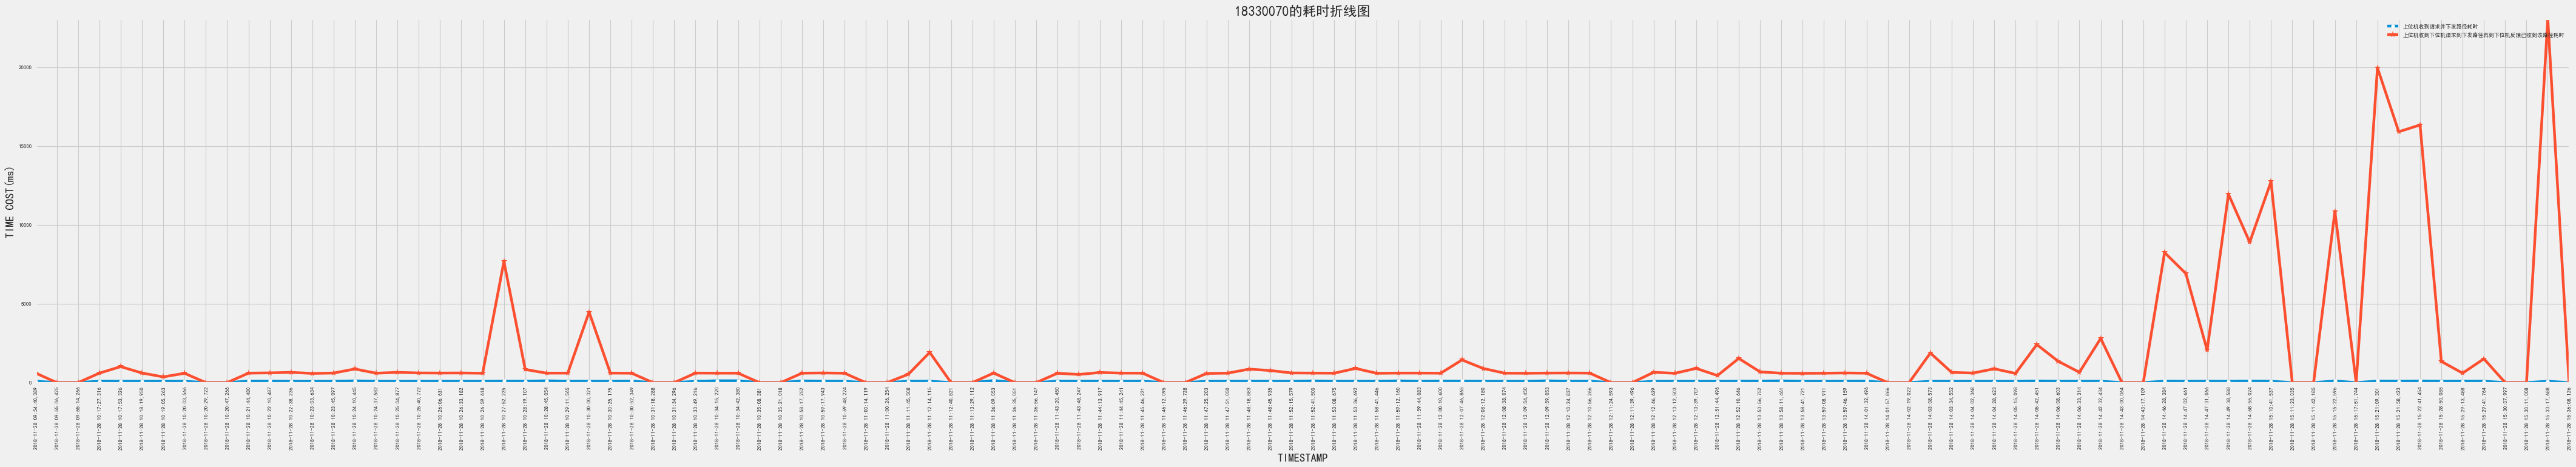

针对18330070，上位机收到请求并下发路径平均耗时68.916667ms
针对18330070，上位机收到下位机请求到下发路径再到下位机反馈已收到该路径平均耗时1747.725000ms



为18330066的统计结果生成折线图......


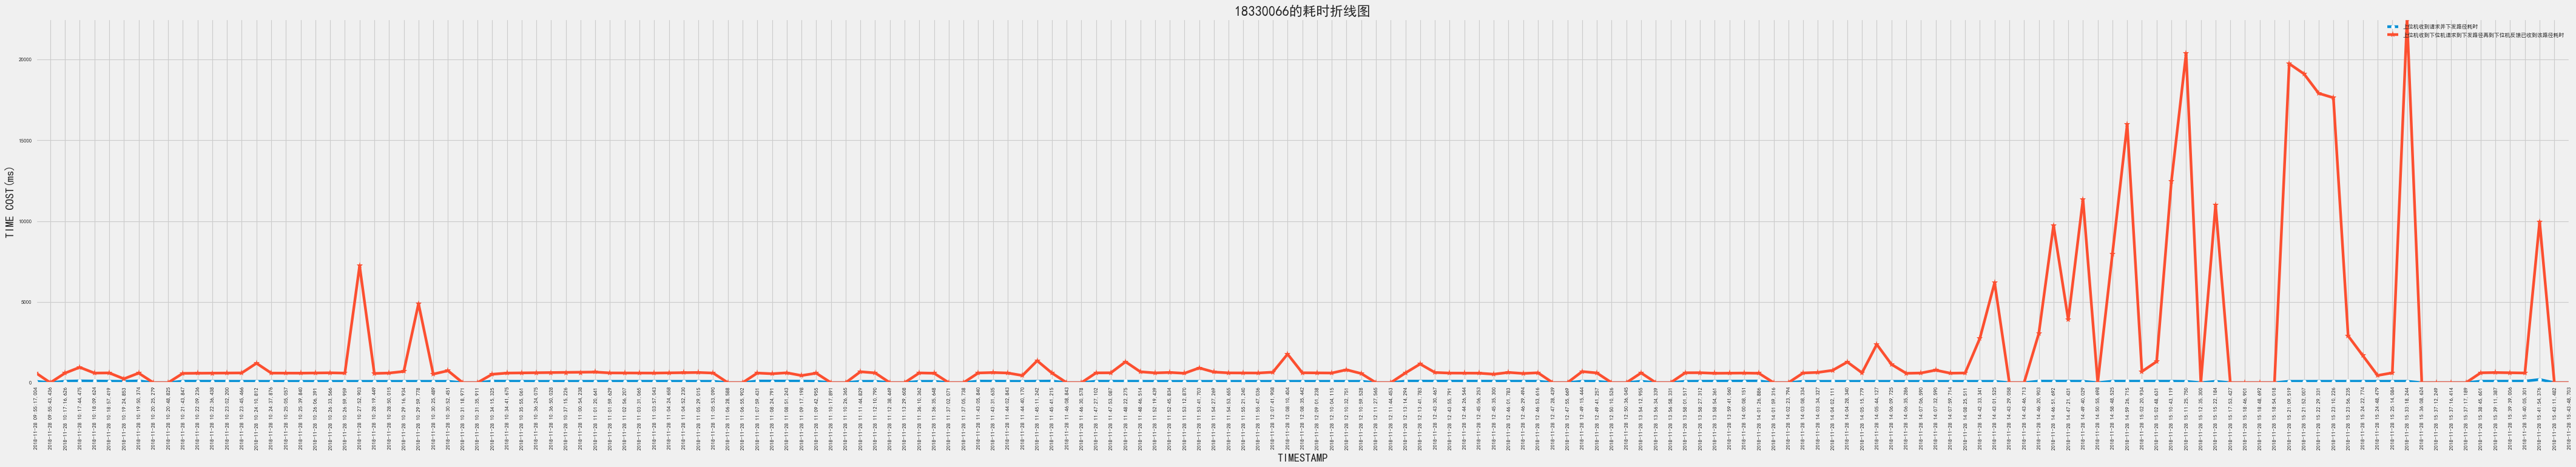

针对18330066，上位机收到请求并下发路径平均耗时68.687861ms
针对18330066，上位机收到下位机请求到下发路径再到下位机反馈已收到该路径平均耗时1760.456647ms



为18330075的统计结果生成折线图......


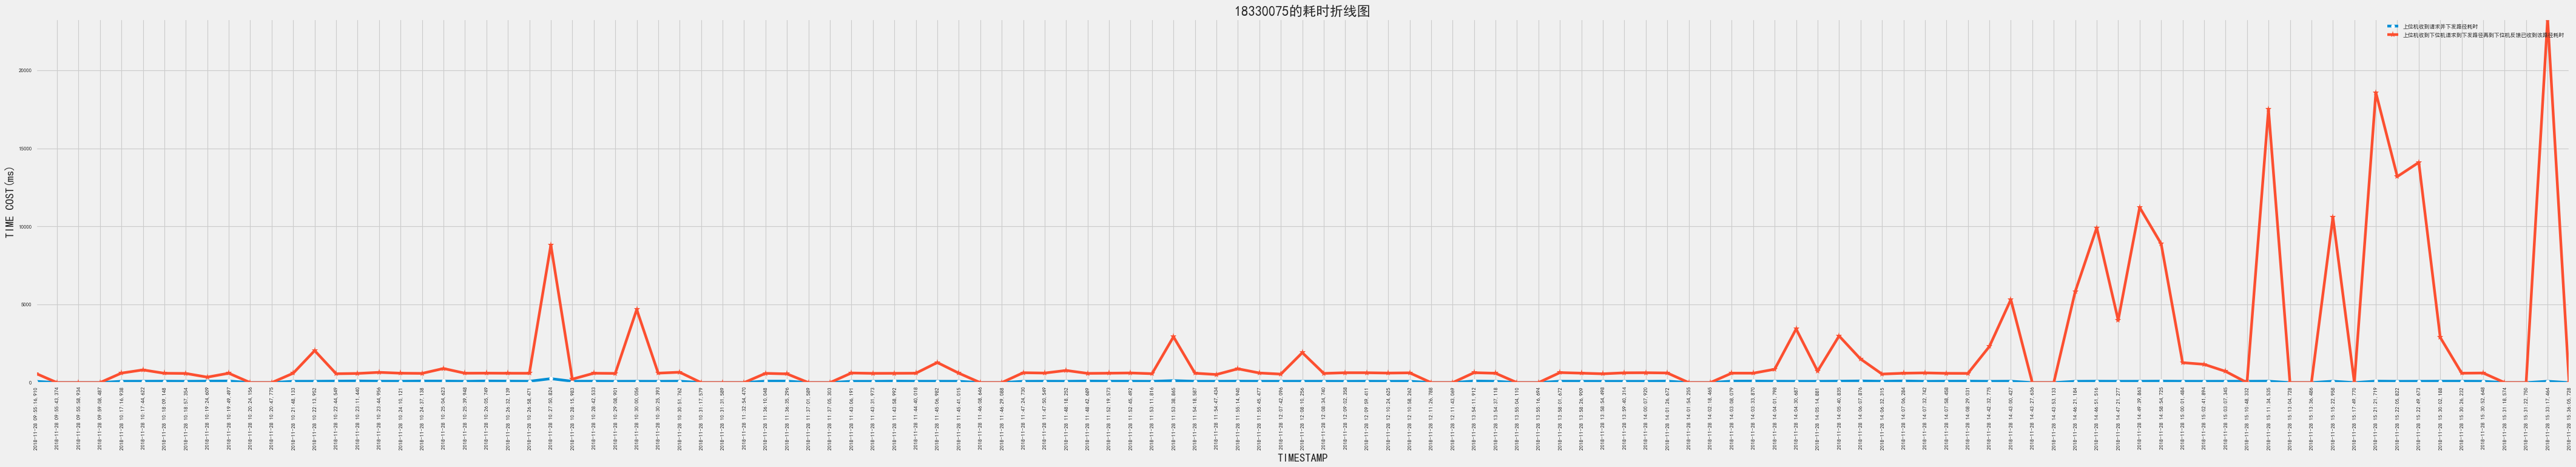

针对18330075，上位机收到请求并下发路径平均耗时69.991597ms
针对18330075，上位机收到下位机请求到下发路径再到下位机反馈已收到该路径平均耗时1856.285714ms





In [251]:
# 按设备编号、收发顺序统计（步骤四）

import matplotlib.pyplot as plt
from pylab import *                                 

#支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']

for index_j in range(len(equipCode_list)) :
    print("为"+equipCode_list[index_j]+"的统计结果生成折线图......")
    class_list = equipCode_class_log_dict[equipCode_list[index_j]]

    x = [] # 横轴
    y1 = [] # 纵轴，上位机收到请求并下发路径耗时
    y2 = [] # 纵轴，上位机收到下位机请求到下发路径再到下位机反馈已收到该路径耗时
    for log_item in class_list :
        x.append(log_item.request_time)
        y1.append(log_item.request_send_time_cost)
        y2.append(log_item.request_feedback_time_cost)
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(60,10))
    plt.plot(x, y1, marker='o', mec='r', mfc='w',label=u'上位机收到请求并下发路径耗时')
    plt.plot(x, y2, marker='*', ms=10, label=u'上位机收到下位机请求到下发路径再到下位机反馈已收到该路径耗时')
    plt.legend()  # 让图例生效
    #plt.grid()
    plt.xticks(x, x, rotation=90)
    plt.margins(0)
    plt.subplots_adjust(bottom=0.15)
    plt.xlabel(u"TIMESTAMP") #X轴标签
    plt.ylabel("TIME COST(ms)") #Y轴标签
    plt.title(equipCode_list[index_j]+"的耗时折线图") #标题
    plt.savefig(equipCode_list[index_j]+"的耗时折线图") #保存图
    plt.show()

    average_time_cost = 0
    for cost in y1 :
        average_time_cost += cost
    average_time_cost = average_time_cost/len(y1)
    print("针对%s，上位机收到请求并下发路径平均耗时%fms"%(equipCode_list[index_j], average_time_cost))

    average_time_cost = 0
    for cost in y2 :
        average_time_cost += cost
    average_time_cost = average_time_cost/len(y1)
    print("针对%s，上位机收到下位机请求到下发路径再到下位机反馈已收到该路径平均耗时%fms"%(equipCode_list[index_j], average_time_cost))
    print("\n\n")